We will train a neural network model to classify images of clothing, like sneakers and shirts.

https://www.tensorflow.org/tutorials/keras/classification


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Import the dataset

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [5]:
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


## Preprocess the data

pixel values fall in the range of 0 to 255

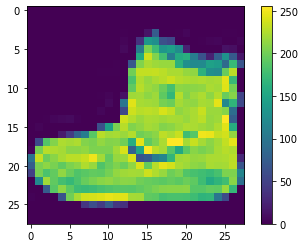

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
train_images = train_images / 255.0
test_images = test_images / 255.0

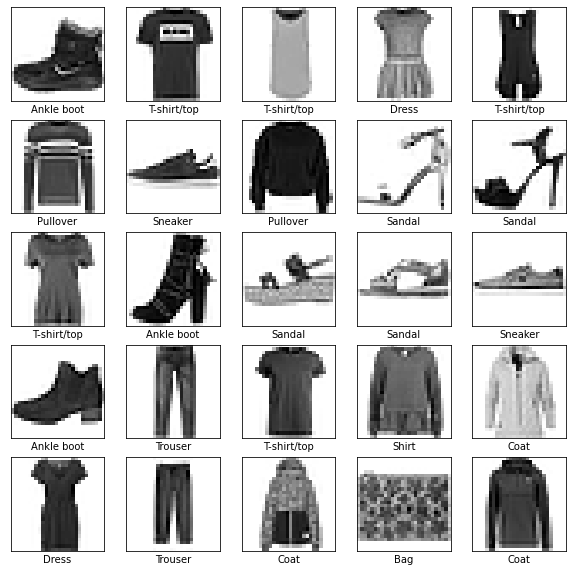

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the mode.

The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. 

Most of deep learning consists of chaining together simple layers. Most layers, such as tf.keras.layers.Dense, have parameters that are learned during training.

The first layer in this network, <b>tf.keras.layers.Flatten</b>, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely connected, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.

Optimizer —This is how the model is updated based on the data it sees and its loss function.

Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10)
])


In [16]:
model.compile(optimizer="adam",
             loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics="accuracy")

In [17]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5021 - accuracy: 0.8235: 
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3816 - accuracy: 0.8615
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3426 - accuracy: 0.8756
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3166 - accuracy: 0.8845
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2994 - accuracy: 0.8901
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2813 - accuracy: 0.8971
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2708 - accuracy: 0.9000
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2590 - accuracy: 0.9043
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2474 - accuracy: 0.9089
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2

In [18]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print("Test Accuracy: ", test_accuracy)

313/313 - 0s - loss: 0.3277 - accuracy: 0.8847
Test Accuracy:  0.8847000002861023


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents overfitting. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data.

## Make Predictions

In [19]:
probability_model = tf.keras.models.Sequential([
    model, 
    tf.keras.layers.Softmax()
])

In [20]:
predictions = probability_model.predict(test_images)

In [21]:
predictions[0]

array([3.6843798e-07, 2.2562317e-11, 1.7634532e-08, 1.0097829e-07,
       7.9319868e-08, 5.1783986e-04, 9.8428451e-08, 3.2599460e-02,
       3.0537740e-05, 9.6685141e-01], dtype=float32)

In [22]:
np.round(predictions[0])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [24]:
np.argmax(predictions[0]), test_labels[0]

(9, 9)

In [25]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

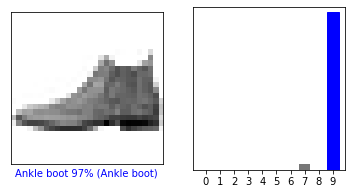

In [26]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

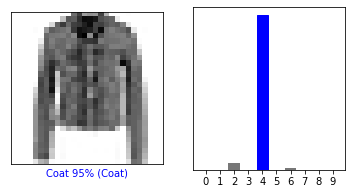

In [28]:
i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

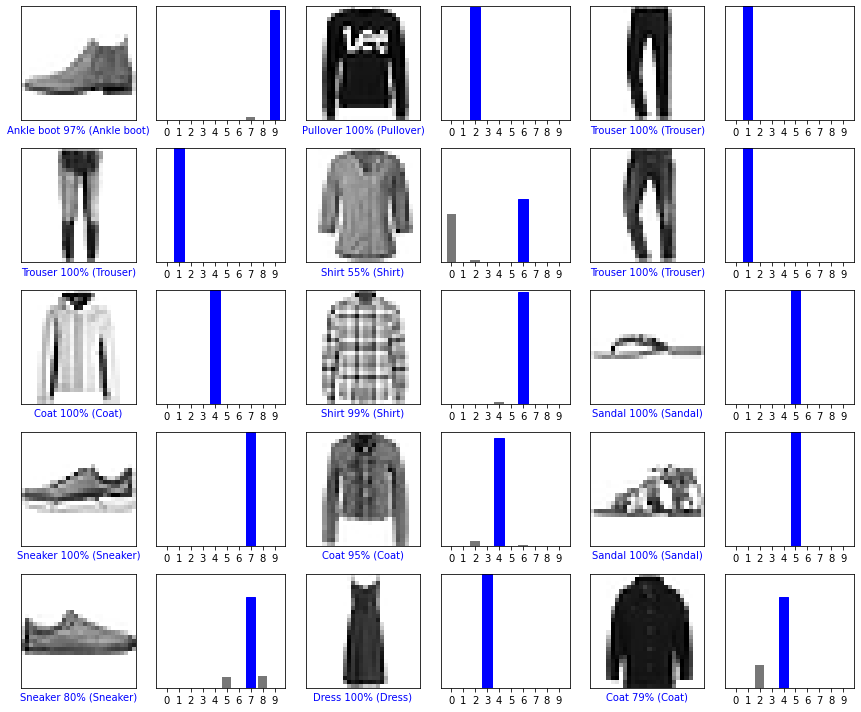

In [29]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Using the trained model

(28, 28)
(1, 28, 28)
[[1.1314375e-03 6.9761093e-11 9.9751174e-01 4.7836891e-11 1.0129163e-03
  2.9284708e-10 3.4393856e-04 1.9841879e-17 3.1596583e-09 4.3892570e-15]]


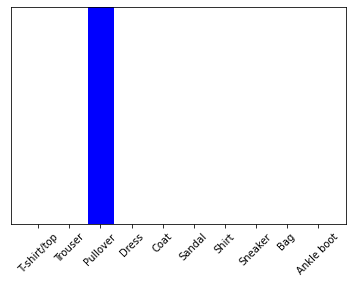

In [30]:
img = test_images[1]
print(img.shape)


# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))
print(img.shape)

predictions_single = probability_model.predict(img)
print(predictions_single)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()